# Run ADAM 

The model ADAM (Annual Danish Aggregate Model)is a model of the Danish
economy maintained and developed by Danmarks Statistik.  A Link to the model: https://www.dst.dk/pubomtale/18836. It has 4624 equations 

Danmarks Statistik has kindly provided the model version JUN17X and an associated databank for this demo. 

The model and databank is not the current model and forecast, but serves as an example. 

This is a basic demo. However you can use all the features of ModelFlow to manipulate the model.  

## Import ModelFlow and Pandas

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from ipywidgets import interact,Dropdown


from IPython.display import display, clear_output

import sys
sys.path.append('modelflow/')

from modelsandbox import newmodel
from modelclass import model 
from modeljupyter import inputwidget
from   modeldekom import totdekomp 

ModelFlow info: CVXopt not installed. Only matters if you are incorporating optimization


## Read model and databank

In [2]:
fadam = open('adam/jul17x.txt','rt').read()
bank  = pd.read_pickle('adam/lang100_2017.pc') 

## Make a model instance 

In [3]:
turbo = 0     # if you set turbo=1 the model will be compiled, it takes time but specd the running up 
madam = newmodel(fadam,modelname='ADAM')    
madam.use_preorder = True  # for speedup 

This model has simultaneous elements or cyclical elements.


## Run the Baseline 

In [4]:
basedf = madam(bank,2018,2030,conv=['YR','UL'],antal=100,alfa=0.4,ljit=turbo,chunk=30,relconv = 0.0000001,silent=True,debug=0)

## Prepare some stuff
The next cell defines variables and functions which makes an experiment and a simple interactive widget.

The cell is here for reference for the advanced user. 

You don't have to study the cell

In [ ]:
# ADAM Variable descriptions 
vtrans = {'ENL'  :'Balance of Payment, surplus','UL':'Unemployment','FY':'Real GDP',
         'TFN_O':'Public surplus','TFN_OY':'Public surplus, Percent of GDP'}

slidedef = {'Value added tax rate':                {'var':'TG','value':0.0,'min':-0.1, 'max':0.1,'op':'+'},
            'Extra labour supply, 1000 ':          {'var':'UQ','value':0.0,'min':-8,    'max':8,   'op':'+','step':1},
            }

input = inputwidget(madam,basedf,slidedef=slidedef
                   ,showout=True,varpat='FY ENL UL TFN_O TFN_OY',modelopt={'silent':True},trans=vtrans)

## Now make the experiment

In [5]:
display(input)

## Which of the changed variables contribute to the changes?

In [9]:
cdekom = totdekomp(madam,desdic=vtrans)

@interact
def show_all(Variable=Dropdown(options = sorted(madam.endogene),value='FY')):
    _ = cdekom.explain_all(Variable,top=0.86)

@interact
def show_attr(Variable= Dropdown(options = sorted(madam.endogene),value='FY'),
              Periode = madam.current_per):
    _ = cdekom.explain_per(Variable,Periode,top=0.85)
    return 

Total dekomp started at :        15:51:01 
Total dekomp took       :           7.431 Seconds


interactive(children=(Dropdown(description='Variable', index=1469, options=('AFCO', 'AFCP', 'AFE', 'AFIBH', 'A…

interactive(children=(Dropdown(description='Variable', index=1469, options=('AFCO', 'AFCP', 'AFE', 'AFIBH', 'A…

## What drives GDP 
The graph can be small, but if you are using the jupyterlab version, you can inspect it through the PDF file. 

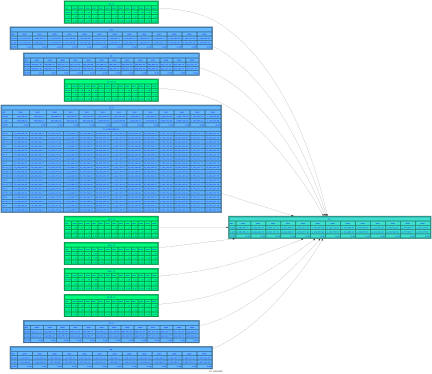

In [7]:
_ = madam.FY.explain(up=1,svg=1,dec=2)

##  Uploade  and downloade to the virtual machine.
In general you should be able to both upload files from your local machine to the virtual machine, and and to download files from the virtual machine to the local machine.  

So even when though the virtual machines disappear you can still get the output to our local machine. And you can modify this notebook and download it for later use. 

## Now try turbo = 1 
Edit the cell above where turbo is set to 0 and change it to 1

Then run the notebook again. This will trigger a just in time compilation by the NUMBA library. The compilation will take time, but the simulation will be much faster.  